# Project 2 Regression Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data

In [2]:
train = pd.read_csv('../datasets/train.csv')

In [3]:
test = pd.read_csv('../datasets/test.csv')

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.shape

(2051, 81)

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [7]:
{key: val for key, val in train.dtypes.items()}

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Year Built': dtype('int64'),
 'Year Remod/Add': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('float64'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('O'),
 'Bsmt Cond': dtype('O'),
 'Bsmt Exposure': dtype('O'),
 'BsmtFin Type 1': dtype('O'),
 'BsmtFin S

In [8]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [9]:
test.shape

(878, 80)

In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


In [11]:
{key: val for key, val in test.dtypes.items()}

{'Id': dtype('int64'),
 'PID': dtype('int64'),
 'MS SubClass': dtype('int64'),
 'MS Zoning': dtype('O'),
 'Lot Frontage': dtype('float64'),
 'Lot Area': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'Lot Shape': dtype('O'),
 'Land Contour': dtype('O'),
 'Utilities': dtype('O'),
 'Lot Config': dtype('O'),
 'Land Slope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition 1': dtype('O'),
 'Condition 2': dtype('O'),
 'Bldg Type': dtype('O'),
 'House Style': dtype('O'),
 'Overall Qual': dtype('int64'),
 'Overall Cond': dtype('int64'),
 'Year Built': dtype('int64'),
 'Year Remod/Add': dtype('int64'),
 'Roof Style': dtype('O'),
 'Roof Matl': dtype('O'),
 'Exterior 1st': dtype('O'),
 'Exterior 2nd': dtype('O'),
 'Mas Vnr Type': dtype('O'),
 'Mas Vnr Area': dtype('float64'),
 'Exter Qual': dtype('O'),
 'Exter Cond': dtype('O'),
 'Foundation': dtype('O'),
 'Bsmt Qual': dtype('O'),
 'Bsmt Cond': dtype('O'),
 'Bsmt Exposure': dtype('O'),
 'BsmtFin Type 1': dtype('O'),
 'BsmtFin S

# Data cleaning

In [12]:
# train null
{col: train[col].isnull().sum() for col in train.columns if train[col].isnull().sum() != 0}

{'Lot Frontage': 330,
 'Alley': 1911,
 'Mas Vnr Type': 22,
 'Mas Vnr Area': 22,
 'Bsmt Qual': 55,
 'Bsmt Cond': 55,
 'Bsmt Exposure': 58,
 'BsmtFin Type 1': 55,
 'BsmtFin SF 1': 1,
 'BsmtFin Type 2': 56,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Fireplace Qu': 1000,
 'Garage Type': 113,
 'Garage Yr Blt': 114,
 'Garage Finish': 114,
 'Garage Cars': 1,
 'Garage Area': 1,
 'Garage Qual': 114,
 'Garage Cond': 114,
 'Pool QC': 2042,
 'Fence': 1651,
 'Misc Feature': 1986}

In [13]:
# test null
{col: test[col].isnull().sum() for col in test.columns if test[col].isnull().sum() != 0}

{'Lot Frontage': 160,
 'Alley': 820,
 'Mas Vnr Type': 1,
 'Mas Vnr Area': 1,
 'Bsmt Qual': 25,
 'Bsmt Cond': 25,
 'Bsmt Exposure': 25,
 'BsmtFin Type 1': 25,
 'BsmtFin Type 2': 25,
 'Electrical': 1,
 'Fireplace Qu': 422,
 'Garage Type': 44,
 'Garage Yr Blt': 45,
 'Garage Finish': 45,
 'Garage Qual': 45,
 'Garage Cond': 45,
 'Pool QC': 874,
 'Fence': 706,
 'Misc Feature': 837}

### Deal with nan data referring to the data dictionary on DSI-US-11 Project 2 Regression Challenge
Most of the nan data in categorical data meaning 'None', so they will be replaced with 'None'

In [14]:
train['Lot Frontage'].fillna(train['Lot Frontage'].mean(), inplace=True)
test['Lot Frontage'].fillna(test['Lot Frontage'].mean(), inplace=True)

In [15]:
train['Alley'].fillna('None', inplace=True)
test['Alley'].fillna('None', inplace=True)

In [16]:
train['Bsmt Qual'].fillna('None', inplace=True)
test['Bsmt Qual'].fillna('None', inplace=True)

In [17]:
train['Bsmt Cond'].fillna('None', inplace=True)
test['Bsmt Cond'].fillna('None', inplace=True)

In [18]:
train['Bsmt Exposure'].fillna('None', inplace=True)
test['Bsmt Exposure'].fillna('None', inplace=True)

In [19]:
train['BsmtFin Type 1'].fillna('None', inplace=True)
test['BsmtFin Type 1'].fillna('None', inplace=True)

In [20]:
train['BsmtFin SF 1'].fillna(0, inplace=True)

In [21]:
train['BsmtFin Type 2'].fillna('None', inplace=True)
test['BsmtFin Type 2'].fillna('None', inplace=True)

In [22]:
train['BsmtFin SF 2'].fillna(0, inplace=True)

In [23]:
train['Bsmt Unf SF'].fillna(0, inplace=True)

In [24]:
train['Total Bsmt SF'].fillna(0, inplace=True)

In [25]:
train['Bsmt Full Bath'].fillna(0, inplace=True)

In [26]:
train['Bsmt Half Bath'].fillna(0, inplace=True)

In [27]:
train['Fireplace Qu'].fillna('None', inplace=True)
test['Fireplace Qu'].fillna('None', inplace=True)

In [28]:
train['Garage Type'].fillna('None', inplace=True)
test['Garage Type'].fillna('None', inplace=True)

In [29]:
train['Garage Yr Blt'].fillna(round(train['Garage Yr Blt'].mean()), inplace=True) 
test['Garage Yr Blt'].fillna(round(test['Garage Yr Blt'].mean()), inplace=True)

In [30]:
train['Garage Finish'].fillna('None', inplace=True)
test['Garage Finish'].fillna('None', inplace=True)

In [31]:
train['Garage Cars'].fillna(round(train['Garage Cars'].mean()), inplace=True)

In [32]:
train['Garage Area'].fillna(round(train['Garage Area'].mean()), inplace=True)

In [33]:
train['Garage Qual'].fillna('None', inplace=True)
test['Garage Qual'].fillna('None', inplace=True)

In [34]:
train['Garage Cond'].fillna('None', inplace=True)
test['Garage Cond'].fillna('None', inplace=True)

In [35]:
train['Pool QC'].fillna('None', inplace=True)
test['Pool QC'].fillna('None', inplace=True)

In [36]:
train['Fence'].fillna('None', inplace=True)
test['Fence'].fillna('None', inplace=True)

In [37]:
train['Misc Feature'].fillna('None', inplace=True)
test['Misc Feature'].fillna('None', inplace=True)

In [38]:
test['Mas Vnr Type'].fillna('None', inplace=True)

In [39]:
test['Mas Vnr Area'].fillna(round(train['Mas Vnr Area'].mean()), inplace=True)

In [40]:
{col: train[col].isnull().sum() for col in train.columns if train[col].isnull().sum() != 0}

{'Mas Vnr Type': 22, 'Mas Vnr Area': 22}

In [41]:
{col: test[col].isnull().sum() for col in test.columns if test[col].isnull().sum() != 0}

{'Electrical': 1}

In [42]:
train.dropna(inplace=True)

In [43]:
{col: train[col].isnull().sum() for col in train.columns if train[col].isnull().sum() != 0}

{}

# EDA

In [44]:
train_numeric_features = [col for col in train._get_numeric_data().columns]

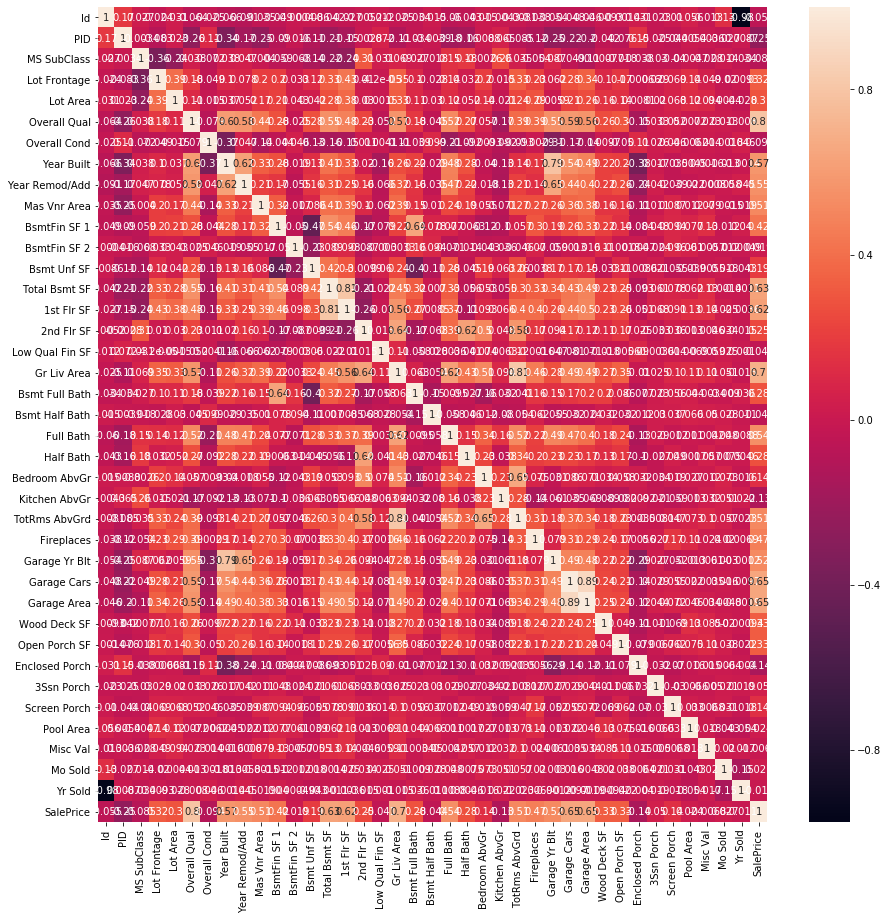

In [45]:
plt.figure(figsize=(15, 15));
sns.heatmap(train[train_numeric_features].corr(), annot=True);

### Display data highly correlated with the SalePrice

In [46]:
train[train_numeric_features].corr()['SalePrice'].sort_values()

PID               -0.252231
Enclosed Porch    -0.138173
Kitchen AbvGr     -0.126083
Overall Cond      -0.094127
MS SubClass       -0.085298
Id                -0.055064
Bsmt Half Bath    -0.043772
Low Qual Fin SF   -0.041098
Yr Sold           -0.010922
Misc Val          -0.006765
BsmtFin SF 2       0.019420
Pool Area          0.023739
Mo Sold            0.027089
3Ssn Porch         0.049839
Screen Porch       0.137724
Bedroom AbvGr      0.140246
Bsmt Unf SF        0.191033
2nd Flr SF         0.250293
Half Bath          0.279484
Bsmt Full Bath     0.284269
Lot Area           0.297322
Lot Frontage       0.324052
Open Porch SF      0.327083
Wood Deck SF       0.328201
BsmtFin SF 1       0.423759
Fireplaces         0.472235
TotRms AbvGrd      0.506305
Mas Vnr Area       0.512230
Garage Yr Blt      0.520994
Full Bath          0.539078
Year Remod/Add     0.549715
Year Built         0.571445
1st Flr SF         0.620776
Total Bsmt SF      0.629731
Garage Cars        0.647040
Garage Area        0

In [47]:
corr_more05 = train[train_numeric_features].corr()['SalePrice'][train[train_numeric_features].corr()['SalePrice'] > 0.5].keys()

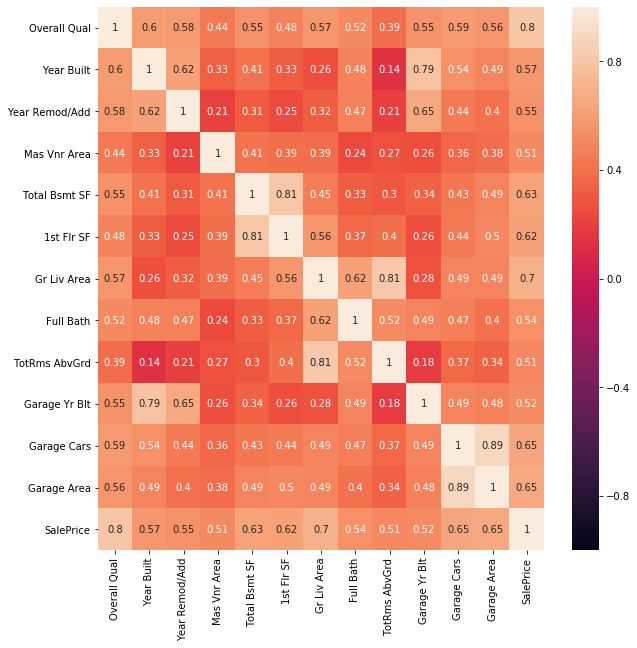

In [48]:
plt.figure(figsize=(10, 10));
sns.heatmap(train[corr_more05].corr(), annot=True, vmin=-1, vmax=1);

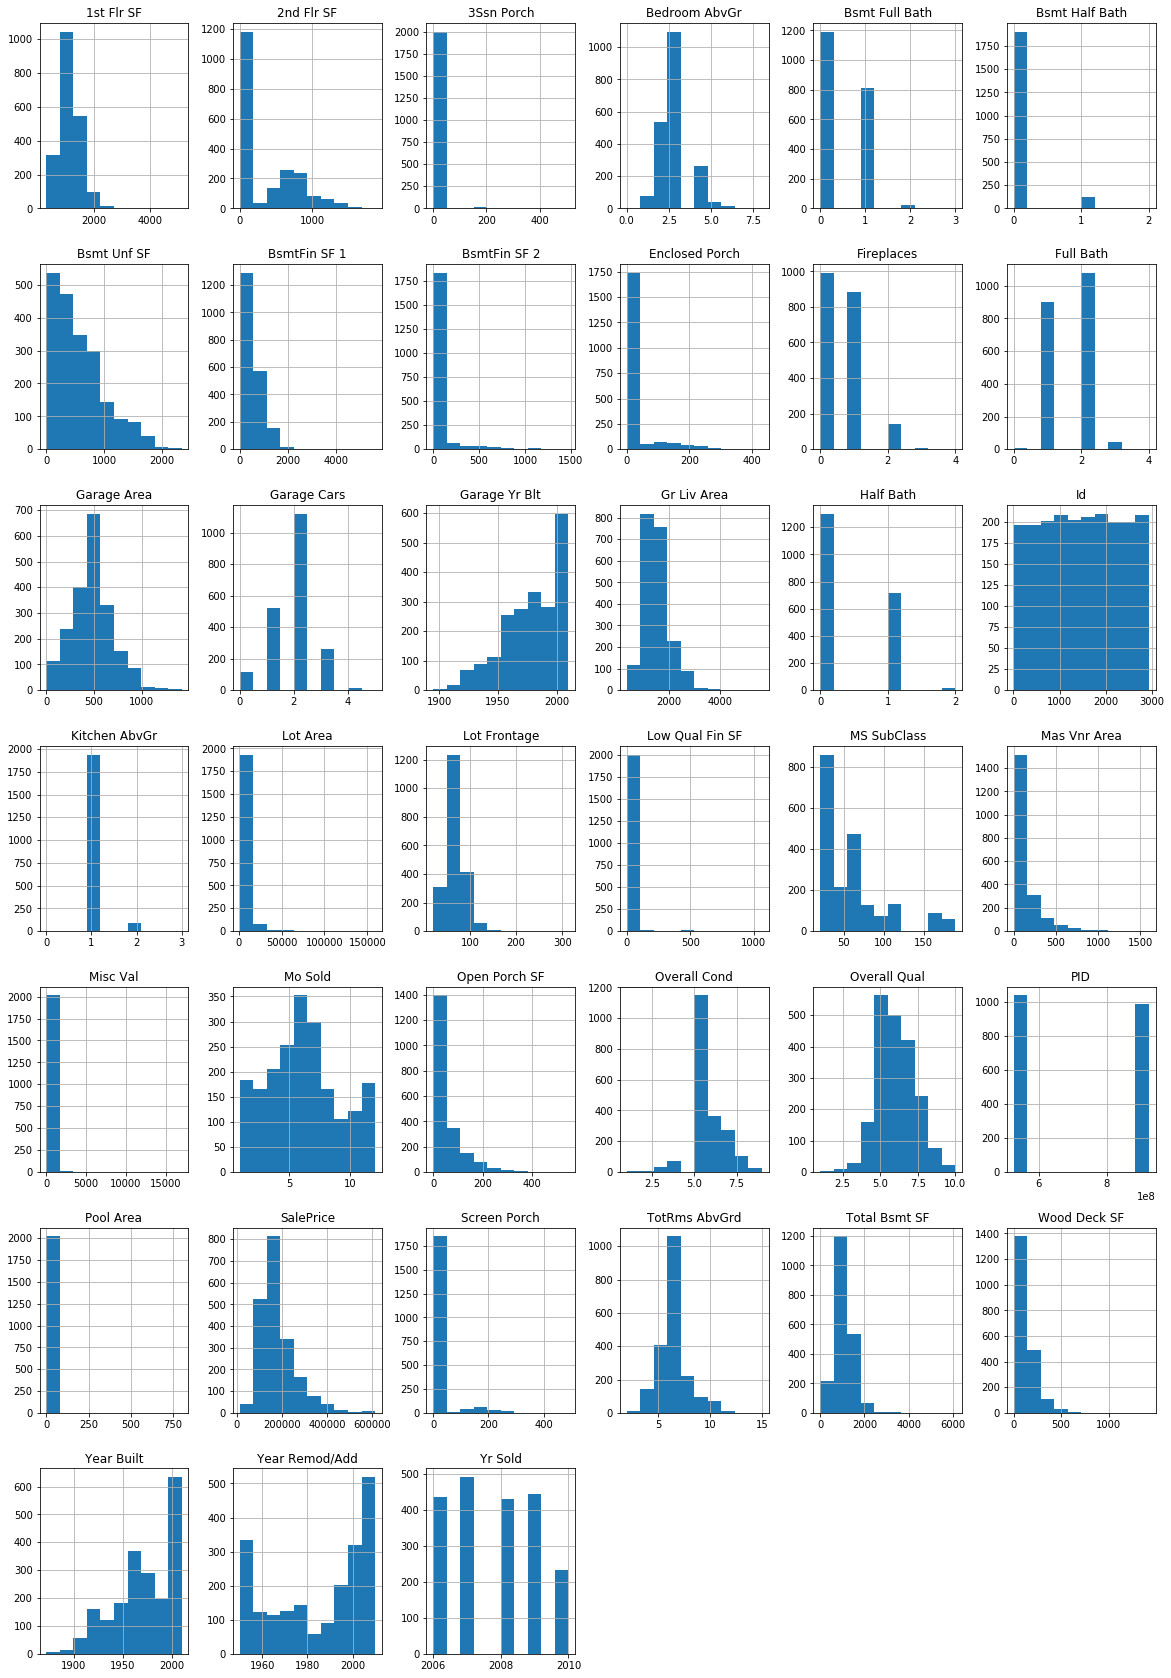

In [49]:
train.hist(figsize=(20, 30));

# Delete outliers from the data highly correlated with the SalePrice

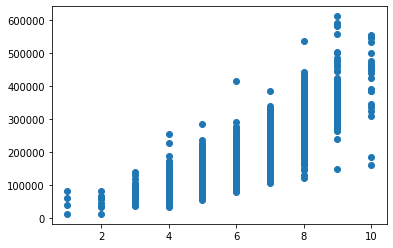

In [50]:
plt.scatter(train['Overall Qual'], train['SalePrice'])

In [51]:
train.drop((train[(train['Overall Qual'] < 7) & (train['SalePrice'] > 400000 )]).index, inplace=True)
train.drop((train[(train['Overall Qual'] < 10) & (train['SalePrice'] > 500000 )]).index, inplace=True)

In [52]:
train.drop((train[(train['Overall Qual'] > 8) & (train['SalePrice'] < 200000 )]).index, inplace=True)

In [53]:
train.shape

(2018, 81)

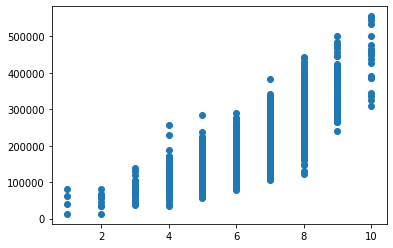

In [54]:
plt.scatter(train['Overall Qual'], train['SalePrice']);

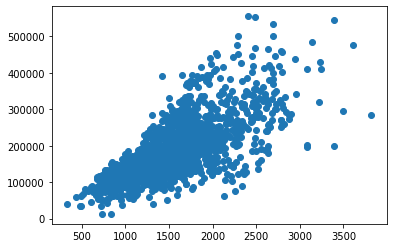

In [55]:
plt.scatter(train['Gr Liv Area'], train['SalePrice']);

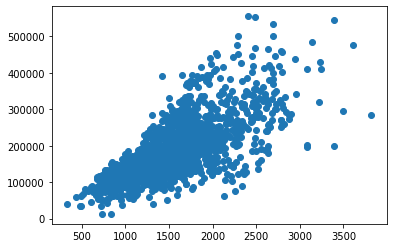

In [56]:
plt.scatter(train['Gr Liv Area'], train['SalePrice']);

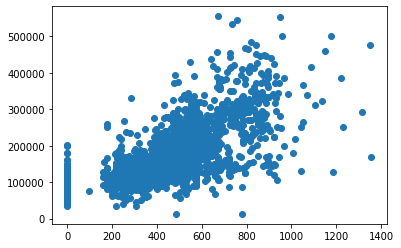

In [57]:
plt.scatter(train['Garage Area'], train['SalePrice']);

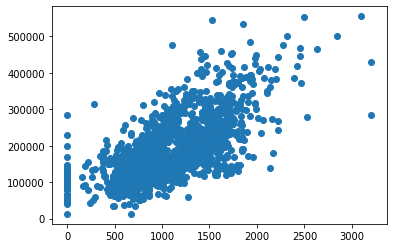

In [58]:
plt.scatter(train['Total Bsmt SF'], train['SalePrice']);

# Display the categorical data

In [59]:
def plot_violinplot(dataframe, list_of_columns, y_column_name, figsize=(100,20)):
    nrows = int(np.ceil(len(list_of_columns)/4)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=4) # You'll want to specify your figsize
    fig.set_figheight(figsize[0]);
    fig.set_figwidth(figsize[1]);
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.violinplot(x=col, y=y_column_name, data=dataframe, ax=ax[i]);

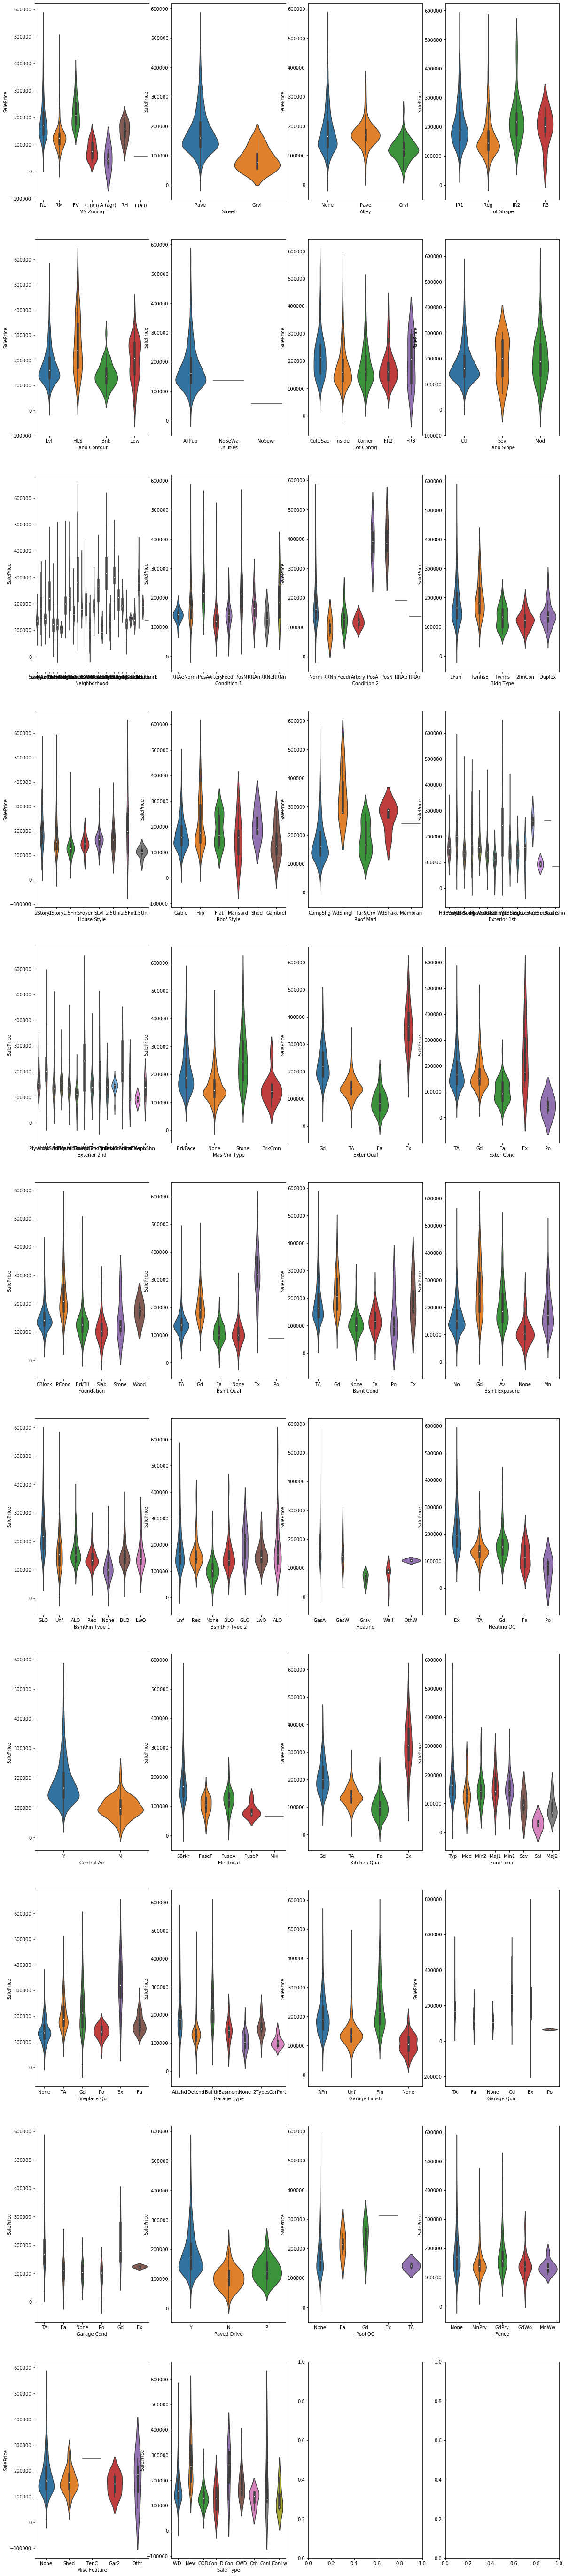

In [60]:
plot_violinplot(
    train, 
    train.select_dtypes(exclude=["number","bool_"]).columns, 
    'SalePrice'
)

# Save the data

In [61]:
train.to_csv('../datasets/train_cleaned_data.csv', index=False)
test.to_csv('../datasets/test_cleaned_data.csv', index=False)